In [43]:
import qiskit # call the qiskit's module

def constant():
	program.x(qr[0])
def balanced():
	program.cx(qr[0], qr[1])
qr = qiskit.QuantumRegister(2) # call a quantum bit (or qubit)
cr = qiskit.ClassicalRegister(1) # call a clasical bit
program = qiskit.QuantumCircuit(qr, cr) # The quantum circuit is generated from the previous qubit and bit
program.h(qr[0])
program.x(qr[1])
program.h(qr[1])
program.barrier()
constant()
program.barrier()
program.h(qr[0])
program.barrier()

In [44]:
program.measure(qr[0],cr) # The qubit is measured and stored in the classic bit.

In [45]:
program.draw()

┌───┐      ░ ┌───┐ ░ ┌───┐ ░ ┌─┐
q45_0: ┤ H ├──────░─┤ X ├─░─┤ H ├─░─┤M├
       ├───┤┌───┐ ░ └───┘ ░ └───┘ ░ └╥┘
q45_1: ┤ X ├┤ H ├─░───────░───────░──╫─
       └───┘└───┘ ░       ░       ░  ║ 
 c7: 1/══════════════════════════════╩═
                                     0

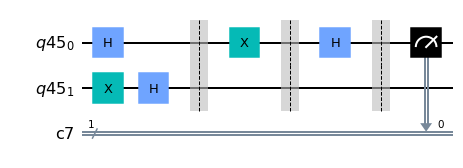

In [46]:
%matplotlib inline
program.draw(output="mpl")

In [47]:
job = qiskit.execute( program, qiskit.BasicAer.get_backend('qasm_simulator') )

In [48]:
print( job.result().get_counts() )

{'0': 1024}


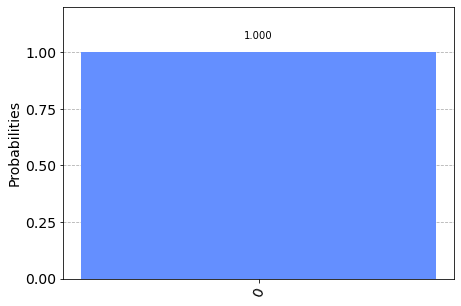

In [49]:
qiskit.visualization.plot_histogram(job.result().get_counts(program))

In [8]:
qiskit.IBMQ.save_account('your_token',overwrite=True) #Replace the text my_token for your own token
qiskit.IBMQ.load_account() # load the token

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = qiskit.IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().quibitss)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 4 & simulated qubits
ibmq_lima : 25 & simulated qubits
ibmq_belem : 33 & simulated qubits
ibmq_quito : 27 & simulated qubits
simulator_statevector : 6 & simulated qubits
simulator_mps : 6 & simulated qubits
simulator_extended_stabilizer : 6 & simulated qubits
simulator_stabilizer : 6 & simulated qubits
ibmq_manila : 13 & simulated qubits
ibm_nairobi : 16 & simulated qubits
ibm_oslo : 44 & simulated qubits


In [50]:
provider = qiskit.IBMQ.get_provider('ibm-q') # select the provider
backend = provider.get_backend('ibmq_lima') # select the name of the quatum computer to use
print("real device:",backend.name())
job = qiskit.execute( program, backend )

real device: ibmq_lima


In [51]:
print( job.result().get_counts() ) # show the result

{'0': 3981, '1': 19}


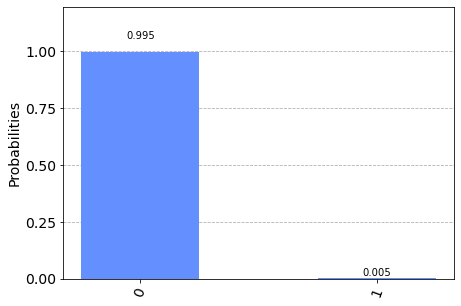

In [52]:
qiskit.visualization.plot_histogram(job.result().get_counts())